#  Titanic Dataset (PCA) - TASK 3



# Step 1: Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [9]:
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Step 2: Keep numeric data only

In [ ]:
x = titanic.select_dtypes(include=[np.number])
x.fillna(x.mean(), inplace=True)
x.shape

labels = titanic.loc[x.index, 'Survived']

(891, 7)

# Step 3: Standardize the data (zero mean)

In [18]:
x_meaned = x - np.mean(x, axis=0)
print("Data after centering (First 5 rows) : \n\n", x_meaned[:5])
print(x_meaned.shape)

Data after centering (First 5 rows) : 

    PassengerId  Survived    Pclass       Age     SibSp     Parch       Fare
0       -445.0 -0.383838  0.691358 -7.699118  0.476992 -0.381594 -24.954208
1       -444.0  0.616162 -1.308642  8.300882  0.476992 -0.381594  39.079092
2       -443.0  0.616162  0.691358 -3.699118 -0.523008 -0.381594 -24.279208
3       -442.0  0.616162 -1.308642  5.300882  0.476992 -0.381594  20.895792
4       -441.0 -0.383838  0.691358  5.300882 -0.523008 -0.381594 -24.154208
(891, 7)


# Step 4: Compute the Covariance Matrix

In [19]:
cov_mat = np.cov(x_meaned, rowvar=False)
cov_mat

array([[ 6.62310000e+04, -6.26966292e-01, -7.56179775e+00,
         1.11113042e+02, -1.63258427e+01, -3.42696629e-01,
         1.61883369e+02],
       [-6.26966292e-01,  2.36772217e-01, -1.37702871e-01,
        -4.41656312e-01, -1.89535808e-02,  3.20167972e-02,
         6.22178683e+00],
       [-7.56179775e+00, -1.37702871e-01,  6.99015120e-01,
        -3.60185492e+00,  7.65986961e-02,  1.24289083e-02,
        -2.28301962e+01],
       [ 1.11113042e+02, -4.41656312e-01, -3.60185492e+00,
         1.69052400e+02, -3.33534501e+00, -1.87798678e+00,
         5.91622003e+01],
       [-1.63258427e+01, -1.89535808e-02,  7.65986961e-02,
        -3.33534501e+00,  1.21604308e+00,  3.68738572e-01,
         8.74873381e+00],
       [-3.42696629e-01,  3.20167972e-02,  1.24289083e-02,
        -1.87798678e+00,  3.68738572e-01,  6.49728244e-01,
         8.66105167e+00],
       [ 1.61883369e+02,  6.22178683e+00, -2.28301962e+01,
         5.91622003e+01,  8.74873381e+00,  8.66105167e+00,
         2.4694368

# Step 5: Compute eigenvalues and eigenvectors

In [21]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

print('Eigenvalues:', eigen_values)
print('Eigenvectors:', eigen_vectors[:, :2])

Eigenvalues: [1.82675370e-01 4.48048946e-01 4.62841297e-01 1.25669033e+00
 1.67516666e+02 2.47082059e+03 6.62316033e+04]
Eigenvectors: [[ 4.16000703e-05 -4.03412412e-05]
 [ 9.34383027e-01  3.49795187e-01]
 [ 3.42344991e-01 -9.11590480e-01]
 [ 9.45134541e-03 -1.14756722e-02]
 [ 4.75276576e-02  6.37494136e-02]
 [-8.59042948e-02  2.05793162e-01]
 [ 7.14624390e-04 -9.98092655e-03]]


# Step 6: Sort eigenvalues and eigenvectors

In [22]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_index]
sorted_eigen_vectors = eigen_vectors[:, sorted_index]

print("Sort Indedx : ",sorted_index)
print("Sort EigenValue : ",sorted_eigen_values)
print("Sort EigenVector : ",sorted_eigen_vectors)

Sort Indedx :  [6 5 4 3 2 1 0]
Sort EigenValue :  [6.62316033e+04 2.47082059e+03 1.67516666e+02 1.25669033e+00
 4.62841297e-01 4.48048946e-01 1.82675370e-01]
Sort EigenVector :  [[-9.99995318e-01  2.58267543e-03 -1.62522860e-03 -2.03936302e-04
   8.83923256e-05 -4.03412412e-05  4.16000703e-05]
 [ 9.23853643e-06 -2.51398590e-03 -3.56961590e-03  5.72131250e-02
  -3.57670587e-02  3.49795187e-01  9.34383027e-01]
 [ 1.15140276e-04  9.26834436e-03 -1.80038149e-02 -1.33112137e-01
  -1.83504253e-01 -9.11590480e-01  3.42344991e-01]
 [-1.68422300e-03 -2.55743387e-02  9.99196359e-01 -2.64254107e-02
  -5.51646528e-03 -1.14756722e-02  9.45134541e-03]
 [ 2.46249032e-04 -3.52393467e-03 -2.12634458e-02 -9.00456840e-01
   4.27071422e-01  6.37494136e-02  4.75276576e-02]
 [ 4.89118430e-06 -3.48631976e-03 -1.26201274e-02 -4.09233123e-01
  -8.84661775e-01  2.05793162e-01 -8.59042948e-02]
 [-2.54041913e-03 -9.99611168e-01 -2.56069031e-02  3.89910828e-03
   1.09730221e-04 -9.98092655e-03  7.14624390e-04]]


# Step 7: Select the top k eigenvectors (top 2)

In [23]:
k = 2
eigen_vector_subset = sorted_eigen_vectors[:, 0:k]
print(eigen_vector_subset.shape)

(7, 2)


# Step 8: Project the data onto the top k eigenvectors

In [24]:
x_reduced = np.dot(x_meaned, eigen_vector_subset)
print("Reduced Data Shape : ",x_reduced.shape)

Reduced Data Shape :  (891, 2)


# Step 9 : Plot the PCA-Reduced Data

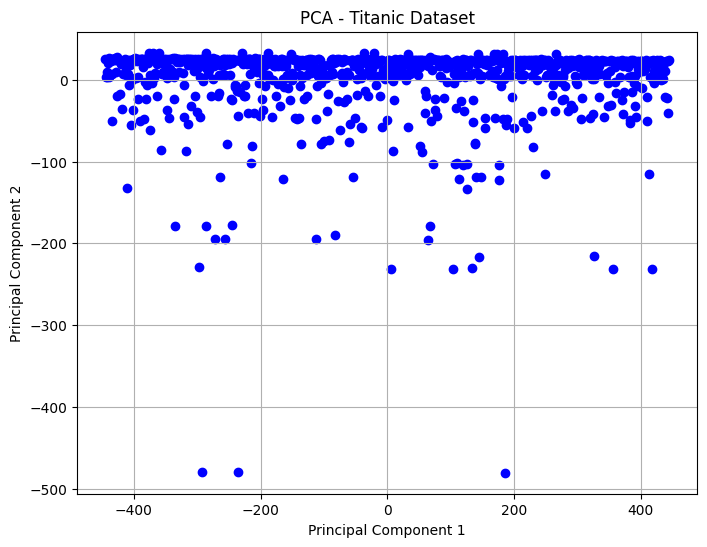

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c='blue' )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Titanic Dataset')
plt.grid(True)
plt.show()